In [2]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Profiling

The data for today comes from the FAA's Wildlife Strike Database (https://wildlife.faa.gov/home). The purpose of this database is to study the frequency of wildlife strikes causing damage to aircraft, as well as to track both injuries and fatalities caused by such strikes.

## Import Data and Initial Checks
Import the file, "StrikeReportsPartial.csv", and save it in a variable called `df`. Then, do some initial checks of the data based on what we covered last class. What can you say about the data?

In [1]:
import pandas
df = pandas.read_csv("StrikeReportsPartial.csv")
df


,INDEX_NR,OPID,ATYPE,AC_MASS,INCIDENT_DATE,TIME_OF_DAY,AIRPORT_ID,SPEED,DISTANCE,PHASE_OF_FLT,DAMAGE,SKY,PRECIP,NR_INJURIES,NR_FATALITIES,NR_INJURIES_0,NR_FATALITIES_0
0,260720,PHM,SIKORSKY S-76,2.0,2009-01-04,Day,UNKN,135.0,NaN,En Route,D,Some Cloud,NaN,1.0,8.0,1,8
1,260583,BUS,CITATION,2.0,2008-03-04,Day,KPWA,NaN,4.0,Climb,D,No Cloud,NaN,NaN,5.0,0,5
2,128423,PVT,PA-23 APACHE,1.0,1998-03-04,Day,UNKN,146.0,NaN,En Route,D,No Cloud,NaN,NaN,2.0,0,2
3,221264,BUS,C-172,1.0,2003-07-08,Day,UNKN,110.0,NaN,En Route,D,Some Cloud,NaN,NaN,2.0,0,2
4,251781,BUS,PA-44 SEMINOLE,2.0,2007-10-23,Night,UNKN,150.0,NaN,En Route,D,No Cloud,NaN,NaN,2.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157522,358804,UNK,UNKNOWN,NaN,2015-03-30,NaN,KUES,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
157523,358805,UNK,UNKNOWN,NaN,2015-03-31,NaN,KCMA,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
157524,358806,UNK,UNKNOWN,NaN,2015-03-31,NaN,KMCI,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
157525,358807,UNK,UNKNOWN,NaN,2015-03-31,NaN,KMFE,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0


## Missing Data

Summary statistics don't help us learn much about missing data. Missing data is often an important consideration because it is not missing at random. 

The `.isna()` method tells us if a value is missing. Run the following command and compare it to the initial preview of the data above:

In [2]:
df.isna()
df.

SyntaxError: invalid syntax (755671547.py, line 2)

There are 157,527 rows of data in this file, so it's not very helpful to see the `True` and `False` for every column and every row. Instead, let's summarize with the `.sum()` method:

In [3]:
df.isna().sum()

INDEX_NR                0
OPID                    0
ATYPE                   0
AC_MASS             37941
INCIDENT_DATE           0
TIME_OF_DAY         58690
AIRPORT_ID              0
SPEED               94140
DISTANCE            66833
PHASE_OF_FLT        51766
DAMAGE              44859
SKY                 71916
PRECIP             150027
NR_INJURIES        157301
NR_FATALITIES      157515
NR_INJURIES_0           0
NR_FATALITIES_0         0
dtype: int64

*In python, the value of `True` is treated as a `1` for the purposes of the `.sum()` method.*

Do we have a missing values problem? What do you think is going on here?

### `pandas` formatting side note

Take a moment to look at the last line of code you ran (`df.isna().sum()`). We're going to be using this type of formatting alot where you list the name of a DataFrame and then list commands separated by `.`'s. Can you guess what is going on here?

Here's another example of this...before running the command, what do you think this will do?

In [4]:
df["TIME_OF_DAY"].isna().sum()

58690

## Accessing Individual Columns

Up to now, we've worked with all columns. But often we want to focus on a specific column. Python uses brackets to restrict a DataFrame to one (or more) columns. For example:

In [5]:
df["TIME_OF_DAY"]

0           Day
1           Day
2           Day
3           Day
4         Night
          ...  
157522      NaN
157523      NaN
157524      NaN
157525      NaN
157526      NaN
Name: TIME_OF_DAY, Length: 157527, dtype: object

Now you try...access the column, DAMAGE:

What if you want more than a single column? Just put a list inside the brackets. In python, a list is also enclosed in brackets, with the elements separated by commas. So, if you wanted both TIME_OF_DAY and DAMAGE, you'd run this command:

In [6]:
df[["TIME_OF_DAY", "DAMAGE"]]
df.


SyntaxError: invalid syntax (2549941316.py, line 2)

Display the ATYPE and AC_MASS columns:

Now, with those same 2 columns, sum up the number of missing values:

The NR_INJURIES column contains numeric data. Answer the following 3 questions:
* How many missing values are there in the NR_INJURIES column?
* Add up the total number of injuries in this DataFrame
* Get the average number (or `mean()`) of injuries in this DataFrame

The 3 most common descriptive statistics methods for numeric data in pandas are: `.sum()`, `.mean()`, and `.std()`.

## Summarizing Categorical Data: Frequency Tables

The `.value_counts()` method lets you know how frequently values appear in a column.

In [7]:
df["TIME_OF_DAY"].value_counts()

TIME_OF_DAY
Day      60963
Night    30164
Dusk      4355
Dawn      3353
NIGHT        1
DAY          1
Name: count, dtype: int64

By the way, what data quality issue can we see based on this frequency table?

Now, build a frequency table for the DAMAGE column:

If you want the percentage/proportion instead of the count, add the `normalize=True` parameter to `.value_counts()`. Try it with the DAMAGE column:

By default, python ignores missing values (`.value_counts()` has a parameter `dropna` which defaults to `True`). If you'd like the percentage relative to all the rows, including those with missing values, set `dropna` equal to `False`:

In [8]:
df["DAMAGE"].value_counts(normalize = True, dropna = False)

DAMAGE
N      0.625436
NaN    0.284770
M      0.047947
S      0.023964
M?     0.017464
D      0.000419
Name: proportion, dtype: float64

Now, use the `round()` function on the previous command to limit the decimals to 2 places:

Now, you try...
* What % of incidents happened at Dusk (from TIME_OF_DAY)...*ignoring* missing rows?
* What % of incidents happened at Dusk (from TIME_OF_DAY)...*including* missing rows?

Use the `round()` function to round all numbers to 3 decimals.

## Contingency Tables

Frequency tables show us counts/percentages for a single column. Contingency tables show the counts/percentages when combining 2 columns. For this, we can use the `crosstab()` function from the `pandas` module:

In [9]:
pandas.crosstab(df["DAMAGE"], df["TIME_OF_DAY"])

TIME_OF_DAY,DAY,Dawn,Day,Dusk,NIGHT,Night
DAMAGE,,,,,,
D,0,1,42,3,0,17
M,0,176,3388,347,0,2244
M?,0,75,1431,109,0,710
N,1,2675,48638,3394,1,25036
S,0,123,1796,180,0,933


Notice this is a *function* and not a *method*, so the name of the function comes first and then the first 2 parameters are the names of the columns you want to include.

If you want to also display row and column totals, include the `margins=True` parameter:

In [10]:
pandas.crosstab(df["DAMAGE"], df["TIME_OF_DAY"], margins = True)

TIME_OF_DAY,DAY,Dawn,Day,Dusk,NIGHT,Night,All
DAMAGE,,,,,,,
D,0,1,42,3,0,17,63
M,0,176,3388,347,0,2244,6155
M?,0,75,1431,109,0,710,2325
N,1,2675,48638,3394,1,25036,79745
S,0,123,1796,180,0,933,3032
All,1,3050,55295,4033,1,28940,91320


Create a contingency table for TIME_OF_DAY and PRECIP, including row and column totals:

You can also get percentages/proportions using the `normalize` parameter. For the `crosstab()` function, the `normalize` parameter has 3 possible values: `"all"`, `"index"`, and `"columns"`. 

The `"all"` setting gives percentages out of the total:

In [11]:
pandas.crosstab(df["DAMAGE"], df["TIME_OF_DAY"], margins = True, normalize = "all")

TIME_OF_DAY,DAY,Dawn,Day,Dusk,NIGHT,Night,All
DAMAGE,,,,,,,
D,0.000000,0.000011,0.000460,0.000033,0.000000,0.000186,0.000690
M,0.000000,0.001927,0.037100,0.003800,0.000000,0.024573,0.067400
M?,0.000000,0.000821,0.015670,0.001194,0.000000,0.007775,0.025460
N,0.000011,0.029293,0.532611,0.037166,0.000011,0.274157,0.873248
S,0.000000,0.001347,0.019667,0.001971,0.000000,0.010217,0.033202
All,0.000011,0.033399,0.605508,0.044163,0.000011,0.316908,1.000000


However, usually it's more helpful to %'s by row or column.

The `"index"` setting gives row %'s and the `"columns"` setting gives column %'s:

In [12]:
pandas.crosstab(df["DAMAGE"], df["TIME_OF_DAY"], margins = True, normalize = "index")
pandas.crosstab(df["DAMAGE"], df["TIME_OF_DAY"], margins = True, normalize = "columns")

TIME_OF_DAY,DAY,Dawn,Day,Dusk,NIGHT,Night,All
DAMAGE,,,,,,,
D,0.0,0.000328,0.000760,0.000744,0.0,0.000587,0.000690
M,0.0,0.057705,0.061271,0.086040,0.0,0.077540,0.067400
M?,0.0,0.024590,0.025879,0.027027,0.0,0.024534,0.025460
N,1.0,0.877049,0.879609,0.841557,1.0,0.865100,0.873248
S,0.0,0.040328,0.032480,0.044632,0.0,0.032239,0.033202


# Basic Visualization

`pandas` supports visualizations, but requires an additional module, `matplotlib`. This module has already been installed on Jupyter Hub and will automatically load whenever you `import pandas`.

## Summarizing Numeric Data

To summarize numeric data visually, ***histograms*** and ***box plots*** are usually your first best choices.

### Histograms

Histograms give a good sense of how your data is distributed. Run the following command...what can you tell about the number of injuries in this DataFrame?

<Axes: ylabel='Frequency'>

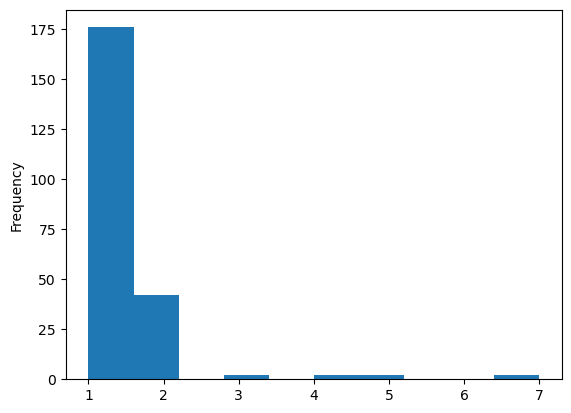

In [13]:
df["NR_INJURIES"].plot.hist()

Now create the same histogram, but this time using the NR_INJURIES_0 column. (This is a column I included to replace missing values with a 0.)

Comparing both histograms, what story does this tell?

<Axes: ylabel='Frequency'>

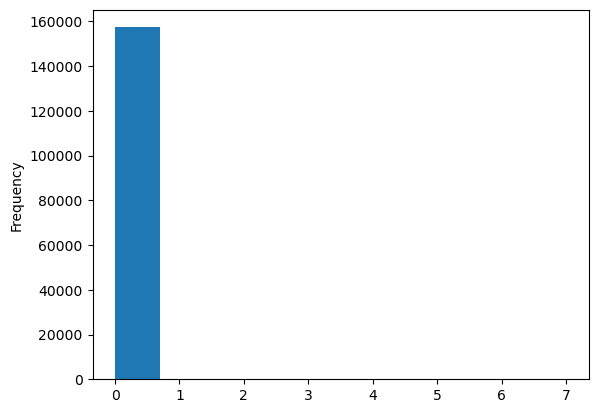

In [14]:
df["NR_INJURIES_0"].plot.hist()

### Box Plots

The box plot command also has a similar structure to histograms:

<Axes: >

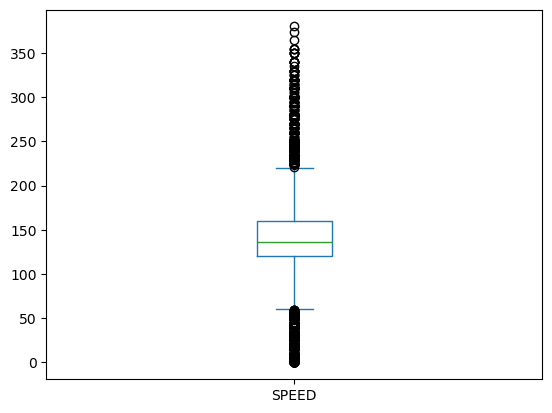

In [15]:
df["SPEED"].plot.box()

The green line represents the median (or 50%) point, with the bottom and top of the box representing the 25% and 75% points respectively. In other words, 50% of the data is within the range shown by the box. The points shown above and below the "whiskers" are considered outliers.

## Summarizing Categorical Data

To summarize categorical data visually, you should use a ***bar chart***. Although bar charts look similar to histograms, they summarize data differently. A histogram takes continuous numerical data and counts the frequency of observations within a certain range (or bin). Bar charts, on the other hand, count up the number of observations in each category. You should use bar charts *only* for categorical data and histograms for numeric data.

### Bar Charts

Bar charts are good for visually summarizing categorical data. Run the following command to see what time of day most incidents occur on:

In [16]:
df["TIME_OF_DAY"].plot.bar()

TypeError: no numeric data to plot

What happened? The `.plot.bar()` method needs summary data to visualize. Can you figure out how to add to the code above to get the bar chart to display?

In [ ]:
df["TIME_OF_DAY"].value_counts().plot.bar()

Just like with frequency tables, so too with bar charts...you can also set the y-axis to show percentages instead of counts:

<Axes: xlabel='TIME_OF_DAY'>

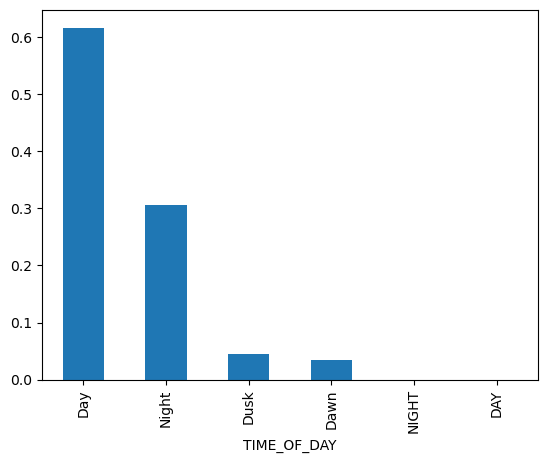

In [17]:
df["TIME_OF_DAY"].value_counts(normalize = True).plot.bar()

## Visualizing Relationships

To visually depict the relationship between 2 numeric variables, you can use a ***scatter plot***. Scatter plots should only be used with numeric data. If you'd like to compare data across multiple categories, you can use bar charts or side-by-side box plots.

### 2 Numeric Variables: Scatter Plots

Because scatterplots show the relationship between 2 numeric variables, the structure of the command is slightly different than the basic plots above:

<Axes: xlabel='AC_MASS', ylabel='NR_INJURIES'>

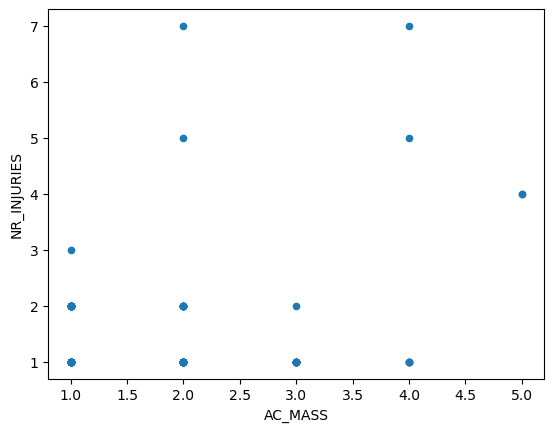

In [18]:
df.plot.scatter(x = "AC_MASS", y = "NR_INJURIES")

### 1 Numeric & 1 Categorical Variable: Side-by-Side Box Plots

If you want to see how the distribution of a numeric variable varies across categories, you can use side-by-side box plots.

The command for a side-by-side box plot is different than for the basic box plot, but similar in structure to scatter plots:

<Axes: title={'center': 'SPEED'}, xlabel='DAMAGE'>

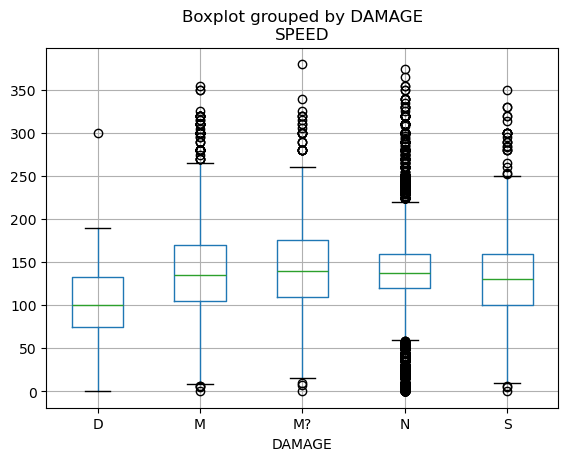

In [19]:
df.boxplot(column = "SPEED", by = "DAMAGE")

The `column` parameter contains the numeric variable you are plotting and the `by` parameter contains a categorical variable you'd like to split the box plots by.

### 2 Categorical Variables: Stacked Bar Charts

To visualize the relationship between 2 categorical variables, you can use a stacked bar chart.

Remember that a bar chart for 1 variable is just a visualization of a frequency table (using `.value_counts()`). A bar chart for 2 variables is a visualization of a contingency table, created with the `crosstab()` function:

<Axes: xlabel='DAMAGE'>

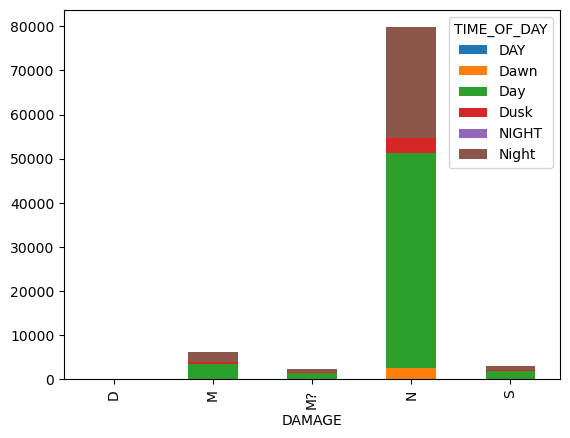

In [20]:
pandas.crosstab(df["DAMAGE"], df["TIME_OF_DAY"]).plot.bar(stacked = True)

As you can see, when there is an imbalance in data across categories, simply looking at the counts can make comparison difficult. One way to fix this is to add `normalize = "index"` to your `crosstab()` command to depict percentages instead:

<Axes: xlabel='DAMAGE'>

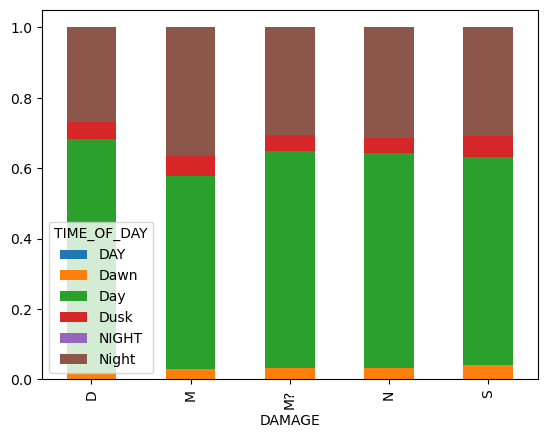

In [21]:
pandas.crosstab(df["DAMAGE"], df["TIME_OF_DAY"], normalize = "index").plot.bar(stacked = True)

## Visualization Practice

Create the following charts:

In [22]:
# Make a histogram looking at the number of fatalities (NR_FATALITIES)


In [23]:
# Make a percentage bar chart by DAMAGE type


In [24]:
# Make a scatterplot showing the relationship between SPEED and DISTANCE


In [25]:
# Make a box plot looking at DISTANCE broken out by TIME_OF_DAY


## Data Profiling Summary

Typically, when first reading in your data, it's a good idea to do the following to profile the data:
* Look at the shape of your DataFrame
* Preview some rows
* Get a sense of the data types for each column
* Use `.isna().sum()` to see how many missing values there are
* Use `.describe()` to summarize the numeric variables
* Use `.value_counts()` and/or `crosstab()` to summarize the categorical variables
* Create charts to quickly visualize your data
   * Histograms and Box Plots are good for visualizing numeric data
   * Bar Charts are good for visualizing categorical data
   * Scatterplots are good for comparing 2 numeric variables to identify relationships